# Data Visualization and Explanation
---


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from IPython.display import display
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

## Set the style

In [78]:
plt.style.use('seaborn')

Data cleaning steps
---
1. Renamed columns names of dataset.
2. Replaced Master's and phd's to Graduate in year columns.
3. Fill missing values in cofidence column to 3.
4. Make sure students' current units are correct, some values were more than 100.
5. Fill missing values in student's current units columns to 0.
6. Fill GPA columns with the average GPA.

In [79]:
data_df = pd.read_csv("data_cleaned.csv")
data_df

,helping_others_confidence,study_group_yesno,feel_confidence,feel_confidence2,study_group_preference,education_fulfillment,curr_class,curr_units,approx_gpa_year1,approx_gpa_win22_1,approx_gpa_win22_2,year,gender,age
0,3,Yes,1,3,Alone,3,CS105,12,3.50,3.9,3.43,Junior,Woman,21
1,5,No,3,4,Alone,4,CS111,14,3.90,3.75,3.81,Sophomore,Man,20
2,5,No,3,3,All the above,2,CS111,12,2.70,2.7,2.70,Sophomore,Man,19
3,4,Yes,4,4,In groups,4,CS105,17,3.90,3.9,3.90,Junior,Man,20
4,1,No,3,3,Alone,4,CS111,15,3.40,3.4,3.40,Junior,Man,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3,No,3,3,Partner,4,CS111,17,3.50,2.85,3.22,Sophomore,Man,19
88,3,No,3,4,All the above,2,CS105,16,2.50,2.5,2.50,Junior,Man,21
89,3,Yes,2,4,Partner,5,CS105,16,4.00,3.9,3.97,Senior,Man,23
90,5,No,1,4,Alone,4,CS105,12,3.50,3,3.50,Junior,Man,Daneil


5    35
4    30
3    15
2     8
1     4
Name: helping_others_confidence, dtype: int64

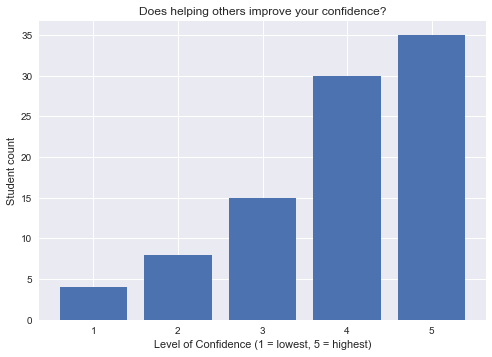

In [80]:
d1 = data_df["helping_others_confidence"]
d2 = d1.value_counts()
display(d2)
plt.title("Does helping others improve your confidence?")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.ylabel("Student count")
plt.bar(d2.index,d2)
plt.show()

Distribution of students who feel that helping others improves their confidence. We can see than many students believes that helping others improves their confidence.

3    29
4    27
2    24
1     8
5     4
Name: feel_confidence, dtype: int64

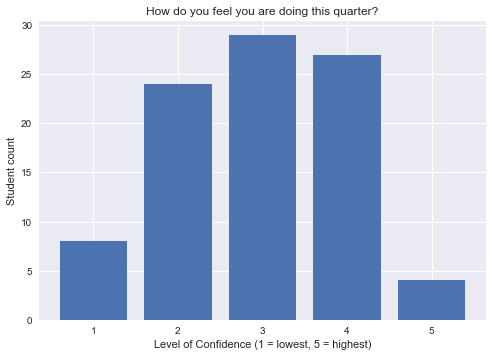

Text(0.5, 1.0, 'Rate the enjoyment/fulfillment you receive from education on a scale of 1-5')

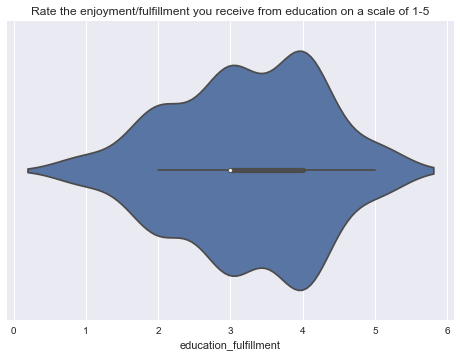

In [81]:
d1 = data_df["feel_confidence"]
d3 = d1.value_counts()
display(d3)
plt.bar(d3.index,d3)
plt.title("How do you feel you are doing this quarter?")
plt.ylabel("Student count")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.show()

sns.violinplot(x = data_df["education_fulfillment"]).set_title("Rate the enjoyment/fulfillment you receive from education on a scale of 1-5")

Top bar graph shows the distribution of confidence level of students this quarter and the second violin plot shows students' sastisfaction level towards education. Students are generally confident and generally enjoy their education. As both the bar graph and violin plot are skewed towards the left.

Alone            28
Partner          26
All the above    23
In groups        15
Name: study_group_preference, dtype: int64

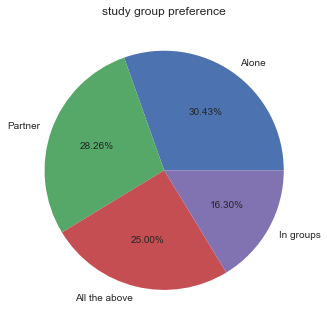

In [82]:
d1 = data_df["study_group_preference"]
d4 = d1.value_counts()
display(d4)
fig, ax = plt.subplots()
ax.set_title('study group preference')
d4.plot.pie(autopct='%.2f%%')
ax.get_yaxis().set_visible(False)

Pie Chart showing distribution of students' preference. The distribution are quite even across the groups.

3    39
4    31
2    10
5     6
1     6
Name: feel_confidence2, dtype: int64

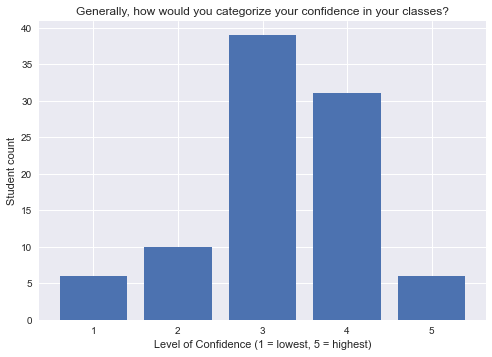

In [83]:
d1 = data_df["feel_confidence2"]
d3 = d1.value_counts()
display(d3)
plt.bar(d3.index,d3)
plt.title("Generally, how would you categorize your confidence in your classes?")
plt.ylabel("Student count")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.show()

Again we can see that students are generally  confident in their class, as the bar graph is skewed towards the left.

Alone            28
Partner          26
All the above    23
In groups        15
Name: study_group_preference, dtype: int64

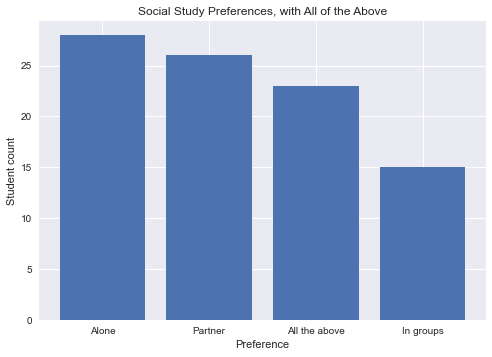

In [84]:
d1 = data_df["study_group_preference"]
d4 = d1.value_counts()
display(d4)
plt.bar(d4.index,d4)
plt.title("Social Study Preferences, with All of the Above")
plt.xlabel("Preference")
plt.ylabel("Student count")
plt.show()

Bar graph showing students' studying preference

Alone        28
Partner      26
In groups    15
Name: study_group_preference, dtype: int64

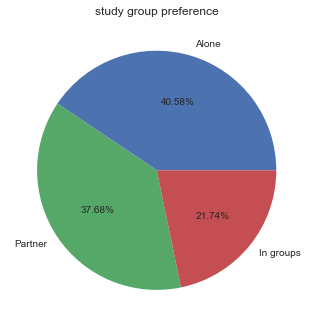

In [85]:
d1 = data_df["study_group_preference"][data_df["study_group_preference"] != "All the above"]
d4 = d1.value_counts()
display(d4)
fig, ax = plt.subplots()
ax.set_title('study group preference')
d4.plot.pie(autopct='%.2f%%')
ax.get_yaxis().set_visible(False)

Pie chart of students' studying preference without all of the above included

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,1,6,0,1
2,4,5,6,9
3,12,6,4,7
4,5,8,5,9
5,1,3,0,0


Text(0.5, 1.0, 'Heat map showing percentages of confidences given study group preference')

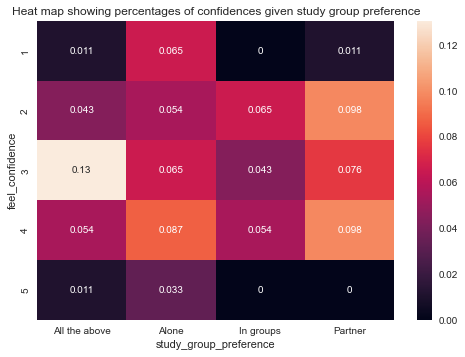

In [86]:
counts_1 = pd.crosstab(data_df.feel_confidence, data_df.study_group_preference)
display(counts_1)
joint = counts_1 / counts_1.sum().sum()
sns.heatmap(joint,annot = True)
plt.title("Heat map showing percentages of confidences given study group preference")


Student's generally pick 3 or all of the above when they are unsure. Hence the hottest stop in the heatmap is at 3 and all of the above. 

<AxesSubplot:xlabel='feel_confidence'>

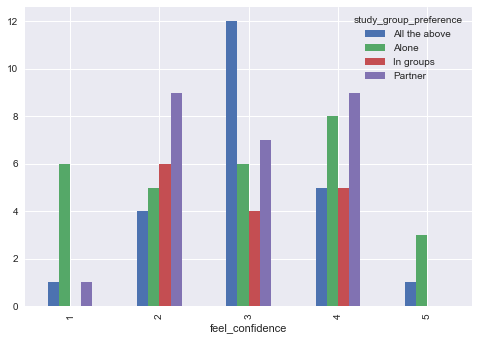

In [87]:
ct = pd.crosstab(data_df.feel_confidence, data_df.study_group_preference)
ct.plot(kind='bar')

Additionally, we can see that students that prefers to work alone has a larger variance than students that prefers to work in group or with a partner. Secondly, the distribution of confidence level of students that prefers to work in groups or with a partner is bimodal.

education_fulfillment,1,2,3,4,5
feel_confidence2,,,,,
1,1,3,1,1,0
2,2,4,2,1,1
3,1,6,18,13,1
4,0,5,7,15,4
5,0,0,1,4,1


<AxesSubplot:xlabel='education_fulfillment', ylabel='feel_confidence2'>

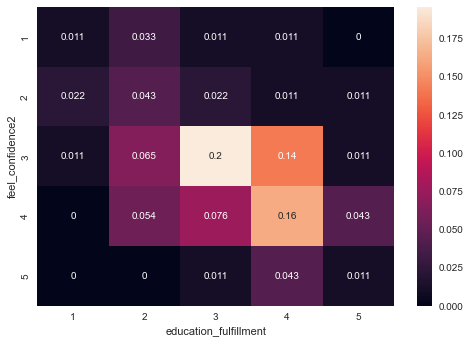

In [88]:
r = pd.crosstab(data_df.feel_confidence2, data_df.education_fulfillment)
display(r)
joint = r / r.sum().sum()
sns.heatmap(joint,annot=True)

Heatmaps shows the joint distribution of students confidence level in class and their education fulfillment.

study_group_preference,Alone,In groups,Partner
feel_confidence2,,,
1,2,2,1
2,5,3,1
3,10,3,15
4,7,7,9
5,4,0,0


<AxesSubplot:xlabel='study_group_preference', ylabel='feel_confidence2'>

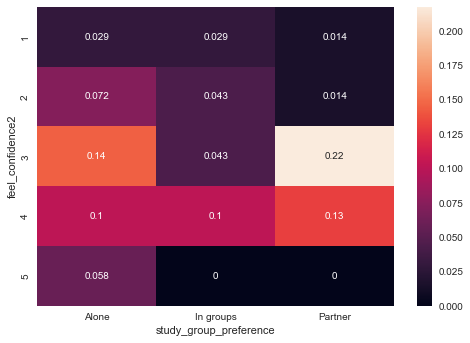

In [89]:
data_df = data_df[data_df["study_group_preference"] != "All the above"]
counts = pd.crosstab(data_df.feel_confidence2, data_df.study_group_preference)
display(counts)
joint = counts / counts.sum().sum()
sns.heatmap(joint,annot = True)

Heatmaps shows the joint distribution of students confidence level in class and their study preference

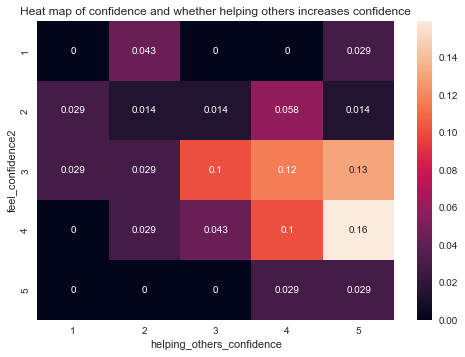

In [110]:
contingency = pd.crosstab(data_df.feel_confidence2, data_df.helping_others_confidence, normalize=True)
sns.heatmap(contingency, annot=True)
plt.title("Heat map of confidence and whether helping others increases confidence")
plt.show()

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,0.043478,0.214286,0.000000,0.038462
2,0.173913,0.178571,0.400000,0.346154
3,0.521739,0.214286,0.266667,0.269231
4,0.217391,0.285714,0.333333,0.346154
5,0.043478,0.107143,0.000000,0.000000


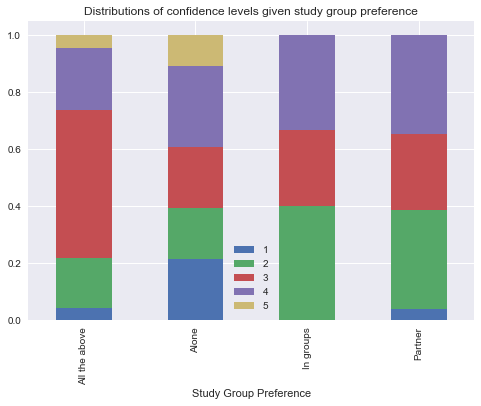

In [90]:
groupPreference_counts = counts_1.sum(axis=0)
confidence_given_groupPreference = counts_1.divide(groupPreference_counts, axis=1)
display(confidence_given_groupPreference)
confidence_given_groupPreference.T.plot.bar(stacked=True)
plt.title("Distributions of confidence levels given study group preference")
plt.xlabel("Study Group Preference")
plt.legend(loc="best")
plt.show()

Student's that prefers to study alone are not more confident but there are more students that prefers to work alone that are less confident than students that prefers to work with others.

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,0.125000,0.750000,0.000000,0.125000
2,0.166667,0.208333,0.250000,0.375000
3,0.413793,0.206897,0.137931,0.241379
4,0.185185,0.296296,0.185185,0.333333
5,0.250000,0.750000,0.000000,0.000000


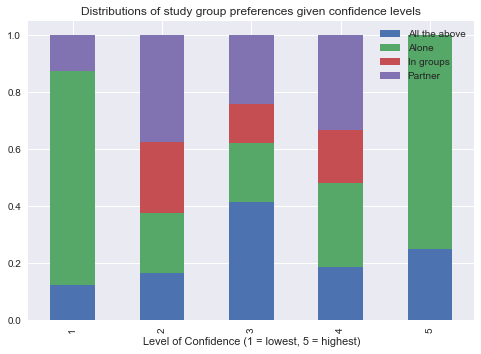

In [91]:
confidence_counts = counts_1.sum(axis=1)
groupPreference_given_confidence = counts_1.divide(confidence_counts, axis=0)
display(groupPreference_given_confidence)
groupPreference_given_confidence.plot.bar(stacked=True)
plt.title("Distributions of study group preferences given confidence levels")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.legend(loc="best")
plt.show()

There is a much larger portion of the students that prefers to work alone than working with others.

---

##### Chi-Square Test Hypothesis 1

In [113]:
print("Running chi square with All the above column")
chi_with, p, dfree, expected = chi2_contingency(counts_1)
print("calculated chi square value:", chi_with)
print("degree of freedom:", dfree)

counts_2 = pd.crosstab(data_df[data_df["study_group_preference"] != "All the above"].feel_confidence,
                       data_df[data_df["study_group_preference"] != "All the above"].study_group_preference)
print("Running chi square without All the above column")
chi_witho, p, dfree, expected = chi2_contingency(counts_2)
print("calculated chi square value:", chi_witho)
print("degree of freedom:", dfree)
print("\n-- RESULTS --")

print(f"Needed chi square value, with All the above column: {chi2.ppf(1-0.05, 12)}")
print(f" - Achieved chi square value: {chi_with}")
print(f" - Success: {True if (chi_with >= chi2.ppf(1-0.05, 12)) else False}")
print(f"Needed chi square value, without All the above column: {chi2.ppf(1-0.05, 8)}")
print(f" - Achieved chi square value: {chi_witho}")
print(f" - Success: {True if (chi_witho >= chi2.ppf(1-0.05, 8)) else False}")
print("--------------")

Running chi square with All the above column
calculated chi square value: 20.442507566932846
degree of freedom: 12
Running chi square without All the above column
calculated chi square value: 12.918184819382297
degree of freedom: 8

-- RESULTS --
Needed chi square value, with All the above column: 21.02606981748307
 - Achieved chi square value: 20.442507566932846
 - Success: False
Needed chi square value, without All the above column: 15.50731305586545
 - Achieved chi square value: 12.918184819382297
 - Success: False
--------------


#### Correlation Test Hypothesis 1

d:\Documents\School\Classes\Spring 2022\CS105\mini_project_repo\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


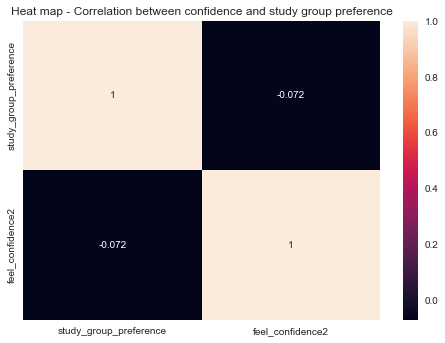

Using Pearson correlation method:
 - Correlation between feel_confidence2 and education_fulfillment: -0.07232453046716339


In [98]:
corr_data = data_df[["study_group_preference", "feel_confidence2"]]
corr_data['study_group_preference'] = pd.Categorical(data_df['study_group_preference'], ['Alone', 'Partner', 'In groups'], ordered=True).codes

correlation = corr_data.corr(method="pearson")

sns.heatmap(correlation, annot=True)
plt.title("Heat map - Correlation between confidence and study group preference")
plt.show()

print("Using Pearson correlation method:")
print(f" - Correlation between feel_confidence2 and education_fulfillment: {correlation.iloc[0, 1]}")

---

##### Chi-Square Test Hypothesis 2

In [104]:
counts = pd.crosstab(data_df.feel_confidence, data_df.education_fulfillment)

print("Running chi square with All the above column")
chi_res, p, dfree, expected = chi2_contingency(counts)
print("calculated chi square value:", chi_res)
print("degree of freedom:", dfree)
print(f"Needed chi square value, with All the above column: {chi2.ppf(1-0.05, dfree)}")
print(f" - Achieved chi square value: {chi_res}")
print(f" - Success: {True if (chi_res >= chi2.ppf(1-0.05, dfree)) else False}")

Running chi square with All the above column
calculated chi square value: 22.498651012852694
degree of freedom: 16
Needed chi square value, with All the above column: 26.29622760486423
 - Achieved chi square value: 22.498651012852694
 - Success: False


##### Correlation Test Hypothesis 2

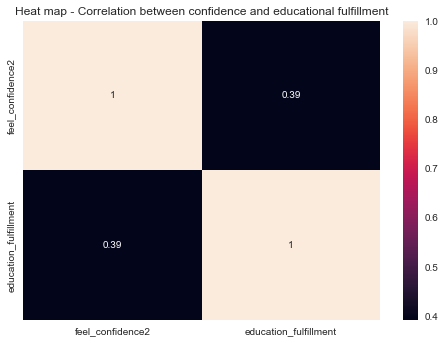

Using Pearson correlation method:
 - Correlation between feel_confidence2 and education_fulfillment: 0.39193761939449173


In [105]:
correlation = data_df[["feel_confidence2", "education_fulfillment"]].corr(method="pearson")

sns.heatmap(correlation, annot=True)
plt.title("Heat map - Correlation between confidence and educational fulfillment")
plt.show()

print("Using Pearson correlation method:")
print(f" - Correlation between feel_confidence2 and education_fulfillment: {correlation.iloc[0, 1]}")

---

##### Chi-Square Test Hypothesis 3

In [106]:
counts = pd.crosstab(data_df.feel_confidence2, data_df.helping_others_confidence)

print("Running chi square with All the above column")
chi_res, p, dfree, expected = chi2_contingency(counts)
print("calculated chi square value:", chi_res)
print("degree of freedom:", dfree)
print(f"Needed chi square value, with All the above column: {chi2.ppf(1-0.05, dfree)}")
print(f" - Achieved chi square value: {chi_res}")
print(f" - Success: {True if (chi_res >= chi2.ppf(1-0.05, dfree)) else False}")

Running chi square with All the above column
calculated chi square value: 25.89135703978561
degree of freedom: 16
Needed chi square value, with All the above column: 26.29622760486423
 - Achieved chi square value: 25.89135703978561
 - Success: False


##### Correlation Test Hypothesis 3

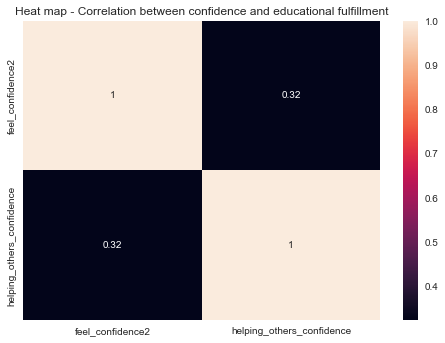

Using Pearson correlation method:
 - Correlation between feel_confidence2 and education_fulfillment: 0.323732942479266


In [107]:
correlation = data_df[["feel_confidence2", "helping_others_confidence"]].corr(method="pearson")

sns.heatmap(correlation, annot=True)
plt.title("Heat map - Correlation between confidence and educational fulfillment")
plt.show()

print("Using Pearson correlation method:")
print(f" - Correlation between feel_confidence2 and education_fulfillment: {correlation.iloc[0, 1]}")

---

## Questions

#### 1. What data do you have?

1)	We have a bar chart showing student’s confidences in helping other students 
2)	We have two bar charts to test student’s statistics with their own confidence and their own grades in class.
3)	We have 2 histogram regarding to students’s study group preferences.
4)	We have heat maps for viewing various bi-variable distributions, such as confidence and group study preference, confidence and educational fulfillment, as well as confidence and proclivity to increase confidence by helping others.
5)  We have 2 stacked bar charts about the correlation between study group preferences and students’ confidence.

#### 2. What would you like to know?

We want to find out what are the correlations between working with others and students’ self-confidence in a class. 

#### 3. Explore the data

By exploring into the the bar chart, we see that the distributional feature is skewed left, there are 29 students rated 4 in confidence level and 34 students rated 5 in confidence level. We see that 63 out of 89 students, meaning around 71% of student think help other students will increase their level of confidence. 

In question 1, we asked students about how they feel about their own confidence in this class and the bar chart shows a symmetric shape, meaning majority of student have average confidence. Only four percents of students are very confident. 

In question 2, we asked student about how confident they feel about their grades in this class, there are 38 students rate for average and 29 student rated for more than average. The graph shows there are around 43% of students think they are average and only 7% of students think they are the highest. We can see that majority of students are average or above average but very feel student are very confident. 

By comparing the results for the first two questions, we can see that students are less confident about how they do in this class than how their grades are ranged within the class. 

The next two histograms show the distribution of student’s preferences in working projects, we gave four options to the student, alone, with a partner, in a group, or all. The first one shows the amount of student choose to work in groups only is the lowest, comparing to alone, partner, or all. After removing the “all” option in the second histogram, we see that majority of students prefer to work alone and only even quarter of students will prefer to work in groups. 

We used a heat map for the preferences to be show specific details about the correlation between the study group preferences and the students’ feelings of confidence.  The heat may shows that highest heat is student with level 4 confidence who are working with a partner, and working alone ranks second for level 4 confidence. We can see that 3.4% of students think they are very confident while working alone, and only 0% feel very confident while working in groups. In this case it means majority of students who are working with a partner feel confident and within people who feel very confident, most of them are working alone. At the same time, working in a group has the lowest distribution in level 1 confident, which shows that working in group decreases student’s chance to feel very unconfident. 

The first stacked bar chart illustrates the confidence level, and we can see that students we choose all of the above are distributed toward average confidence, and working in groups is either confident or not confident.
The second stacked bar chart illustrates the study group preferences. The bar chart informs us that student feel very confident will most likely to choose working alone, students who feel confident will likely to choose to work with a partner or work alone, students who have average confident will most likely to choose all of the above, and students who are not confident will likely to choose to work with a partner. Interestingly, we see that students who have lowest confident will most likely to choose work alone and not work with a group.


#### 4. Can you state any hypotheses or make some predictions? Which tests can you apply to verify your hypothesis?

---

##### Hypothesis 1

*Null hypothesis:* the preference of students (whether they like to work together or alone), does not have an impact on their level of confidence in the given class.

*Alternative hypothesis:* the preference of students (whether they like to work together or alone), does have an impact on their level of confidence in the given class.

##### Hypothesis 2

*Null hypothesis:* the confidence level of a student does not have an impact on their educational fulfillment.

*Alternative hypothesis:* the confidence level of a student does have an impact on their educational fulfillment.

##### Hypothesis 3

*Null hypothesis:* increase of confidence by helping others does not impact the student's level of confidence.

*Alternative hypothesis:* increase of confidence by helping others does impact the student's level of confidence.

We apply two tests: (1) $\chi ^2$ analysis, and (2) Pearson correlation test; every hypothesis undergoes both of these tests to determine correlation.

---

#### 5. Test your hypotheses

---

### Hypothesis 1

We tested our hypothesis using $\chi ^2$ analysis. The tests were separated into two parts: (1) including "All the above" submissions for the `study_preference` columns, and (2) excluding "All the above" submissions for the `study_preference` column.


##### Part 1

In part (1), our contingency table has 12 degrees of freedom. $r = 5$, and $c = 4$, so $DF = (r-1)(c-1) = 4 \cdot 3 = 12$. Following the table for $\chi ^2$ analysis, we find that in order to reject the null hypothesis at a 95% confidence level, we need to achieve a $\chi ^2$ value of 21.026. However, as we can see from the function `chi2_contingency()`, the resulting value was 18.43.

Therefore, since our $\chi ^2$ failed to reach the needed value for 12 degrees of freedom, at a 95% confidence level, we fail to reject the null hypothesis at 95% confidence, and conclude that the study preferences of students generally does not affect their level of confidence.


##### Part 2

In part (2), our contingency table has 8 degrees of freedom. Since we removed one of the columns ("All the above"), we now have $r = 5$, and $c = 3$, and thus $DF = (r - 1)(c - 1) = 4 \cdot 2 = 8$. Following the same table as in Part 1, we found that we needed a $\chi ^2$ value of 15.507 in order to reject the null hypothesis. However, as we can see from the function `chi2_contingency()`, the resulting value was 11.117.

Therefore, since our $\chi ^2$ failed to reach the needed value for 8 degrees of freedom, at a 95% confidence level, we fail to reject the null hypothesis at 95% confidence, and conclude that the study preferences of students generally does not affect their level of confidence.

We also ran a Pearson correlation test, but there did not seem to be any correlation between the confidence of a student and their group preference. Thus, we cannot say that the two variables are connected, which is strengthened by the result of our $\chi ^2$ analysis test.

### Hypothesis 2

We tested using $\chi ^2$ analysis similarly to with Hypothesis 1. Our contingency table had 16 degrees of freedom, and at a 95% confidence we needed a $\chi ^2$ value of 26.296. However, our $\chi ^2$ value fell short, at approximately 22.499. Thus, we fail to reject the null hypothesis and conclude that student confidence does not increase educational fulfillment.

There is however, a moderately positive correlation between the confidence of a student and their educational fulfillment. We ran a Pearson correlation test, in which we found the correlation between these two variables to be approximately 0.392. This moderate positive correlation implies that there might be a connection between the two variables, though results are inconclusive because of the $\chi ^2$ test.

### Hypothesis 3

We tested using $\chi ^2$ analysis similarly to with Hypothesis 1. Our contingency table had 16 degrees of freedom, and at a 95% confidence we needed a $\chi ^2$ value of 26.296. However, our $\chi ^2$ value fell short, at approximately 25.891. Thus, we fail to reject the null hypothesis and conclude that student confidence does not affect their confidence boost by helping others.

There is however, a moderately positive correlation between the confidence of a student and their educational fulfillment. We ran a Pearson correlation test, in which we found the correlation between these two variables to be approximately 0.324. This moderate positive correlation implies that there might be a connection between the two variables, though results are inconclusive because of the $\chi ^2$ test.

---